# International football results from 1872 to 2019

## Context

Well, what happened was that I was looking for a semi-definite easy-to-read list of international football matches and couldn't find anything decent. So I took it upon myself to collect it for my own use. I might as well share it.

## Content

This dataset includes 40,838 results of international football matches starting from the very first official match in 1972 up to 2019. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

'results.csv' includes the following columns:

1. date - date of the match
2. home_team - the name of the home team
3. away_team - the name of the away team
4. home_score - full-time home team score including extra time, not including penalty-shootouts
5. away_score - full-time away team score including extra time, not including penalty-shootouts
6. tournament - the name of the tournament
7. city - the name of the city/town/administrative unit where the match was played
8. country - the name of the country where the match was played
9. neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


Note on team and country names: For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

## Acknowledgements

The data is gathered from several sources including but not limited to Wikipedia, fifa.com, rsssf.com and individual football associations' websites.

## Inspiration

Some directions to take when exploring the data:

1. Who is the best team of all time
2. Which teams dominated different eras of football
3. What trends have there been in international football throughout the ages - home advantage, total goals scored, distribution of teams' strength etc
4. Can we say anything about geopolitics from football fixtures - how has the number of countries changed, which teams like to play each other
5. Which countries host the most matches where they themselves are not participating in
6. How much, if at all, does hosting a major tournament help a country's chances in the tournament
7. Which teams are the most active in playing friendlies and friendly tournaments - does it help or hurt them

The world's your oyster, my friend.

# Stage 1 - Import the Dataset and Libraries:

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset:

In [2]:
path_directory = '/Users/y.s.lee/OneDrive/MSc Data Science/Semester 3/Data VIsualisation NEW (COMP5048)/Assignments/Assignment 2/Data/'

data_football = pd.read_csv(path_directory + 'results.csv')

# Stage 2 - Review the Dataset:

In [3]:
data_football.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [4]:
data_football.tail()

date         home_team        away_team  home_score  away_score  \
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

                   tournament       city country  neutral  
40834           Pacific Games       Apia   Samoa     True  
40835           Pacific Games       Apia   Samoa     True  
40836  African Cup of Nations      Cairo   Egypt     True  
40837    Intercontinental Cup  Ahmedabad   India     True  
40838           Pacific Games       Apia   Samoa     True

In [5]:
data_football.shape

(40839, 9)

In [6]:
data_football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


# Stage 3 - Clean the Dataset:

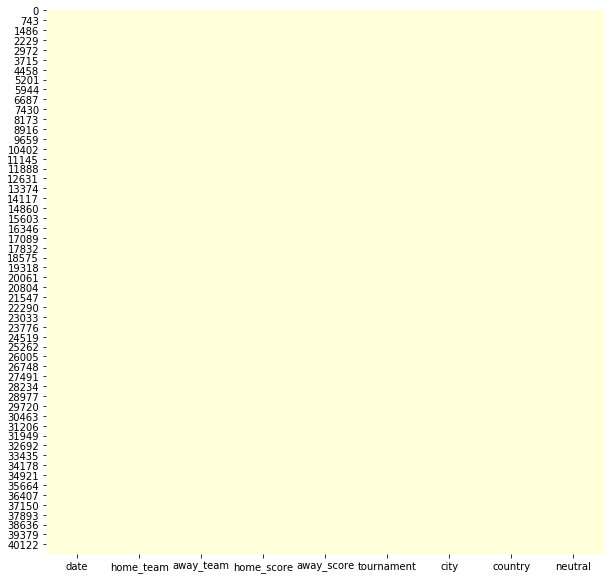

In [7]:
# Visualise it:

plt.figure(figsize=(10,10))
sns.heatmap(data_football.isnull(), cbar = False, cmap = "YlGnBu")

From the figure above, it seems like the dataset is complete and does not have missing data.

# Task 1 Analysis - Understand ranking of teams based on results from various competitions

For this task, the idea is to determine the outcome of each matches between the home and away teams, where the wining team will gain a score in points towards their ranking. The cumulative frequency of wining matches by each team will then determine its position on a ranking (leadership) board. The scores can be taken as three categories, winning the match, losing the match, and having a draw. However, this ranking/leadership board is non-conventional as it only takes into accounts of wining scores from matches played by each team. The ranking board should convey which teams has accumulated the most wins over time.


## THE FOLLOWING IS BASED AROUND THE 'HOME TEAM'

## Remove 'Friendly' matches:

In [8]:
data_football = data_football[data_football.tournament != 'Friendly']

In [9]:
data_football.head()

date         home_team         away_team  home_score  away_score  \
29  1884-01-26  Northern Ireland          Scotland           0           5   
30  1884-02-09             Wales  Northern Ireland           6           0   
31  1884-02-23  Northern Ireland           England           1           8   
32  1884-03-15          Scotland           England           1           0   
33  1884-03-17             Wales           England           0           4   

              tournament     city              country  neutral  
29  British Championship  Belfast  Republic of Ireland    False  
30  British Championship  Wrexham                Wales    False  
31  British Championship  Belfast  Republic of Ireland    False  
32  British Championship  Glasgow             Scotland    False  
33  British Championship  Wrexham                Wales    False

In [10]:
data_football.tail()

date         home_team        away_team  home_score  away_score  \
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

                   tournament       city country  neutral  
40834           Pacific Games       Apia   Samoa     True  
40835           Pacific Games       Apia   Samoa     True  
40836  African Cup of Nations      Cairo   Egypt     True  
40837    Intercontinental Cup  Ahmedabad   India     True  
40838           Pacific Games       Apia   Samoa     True

In [11]:
data_football.shape

(23928, 9)

## Find the Winner in each Tournament for each Competition year:

In [50]:
data_football_tournaments = data_football.copy()

In [51]:
data_football_tournaments['date'] = pd.to_datetime(data_football_tournaments['date'])

In [53]:
data_football_tournaments.head()

date         home_team         away_team  home_score  away_score  \
29 1884-01-26  Northern Ireland          Scotland           0           5   
30 1884-02-09             Wales  Northern Ireland           6           0   
31 1884-02-23  Northern Ireland           England           1           8   
32 1884-03-15          Scotland           England           1           0   
33 1884-03-17             Wales           England           0           4   

              tournament     city              country  neutral  
29  British Championship  Belfast  Republic of Ireland    False  
30  British Championship  Wrexham                Wales    False  
31  British Championship  Belfast  Republic of Ireland    False  
32  British Championship  Glasgow             Scotland    False  
33  British Championship  Wrexham                Wales    False

In [54]:
data_football_tournaments['year'], data_football_tournaments['month'] = data_football_tournaments['date'].dt.year, data_football_tournaments['date'].dt.month

In [56]:
data_football_tournaments['year'].unique()

array([1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894,
       1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

In [57]:
dat_tournament = data_football_tournaments.groupby('tournament')

In [58]:
dat_tournament_group =  dat_tournament.get_group('FIFA World Cup')
dat_tournament_group

date       home_team      away_team  home_score  away_score  \
1300  1930-07-13         Belgium  United States           0           3   
1301  1930-07-13          France         Mexico           4           1   
1302  1930-07-14          Brazil     Yugoslavia           1           2   
1303  1930-07-14            Peru        Romania           1           3   
1304  1930-07-15       Argentina         France           1           0   
1305  1930-07-16           Chile         Mexico           3           0   
1306  1930-07-17         Bolivia     Yugoslavia           0           4   
1307  1930-07-17        Paraguay  United States           0           3   
1309  1930-07-18         Uruguay           Peru           1           0   
1310  1930-07-19       Argentina         Mexico           6           3   
1311  1930-07-19           Chile         France           1           0   
1312  1930-07-20         Belgium       Paraguay           0           1   
1313  1930-07-20         Bolivia         Brazil           0           4   
1314  1930-07-21         Uruguay        Romania           4           0   
1315  1930-07-22       Argentina          Chile           3           1   
1317  1930-07-26       Argentina  United States           6           1   
1318  1930-07-27         Uruguay     Yugoslavia           6           1   
1319  1930-07-30         Uruguay      Argentina           4           2   
1674  1934-05-27       Argentina         Sweden           2           3   
1675  1934-05-27         Austria         France           3           2   
1676  1934-05-27         Belgium        Germany           2           5   
1677  1934-05-27          Brazil          Spain           1           3   
1678  1934-05-27  Czechoslovakia        Romania           2           1   
1679  1934-05-27           Egypt        Hungary           2           4   
1680  1934-05-27           Italy  United States           7           1   
1681  1934-05-27     Netherlands    Switzerland           2           3   
1682  1934-05-31         Austria        Hungary           2           1   
1683  1934-05-31  Czechoslovakia    Switzerland           3           2   
1684  1934-05-31         Germany         Sweden           2           1   
1685  1934-05-31           Italy          Spain           1           1   
...          ...             ...            ...         ...         ...   
39896 2018-06-25           Spain        Morocco           2           2   
39897 2018-06-25            Iran       Portugal           1           1   
39898 2018-06-26       Australia           Peru           0           2   
39899 2018-06-26         Denmark         France           0           0   
39900 2018-06-26         Nigeria      Argentina           1           2   
39901 2018-06-26         Iceland        Croatia           1           2   
39902 2018-06-27     South Korea        Germany           2           0   
39903 2018-06-27          Mexico         Sweden           0           3   
39904 2018-06-27          Serbia         Brazil           0           2   
39905 2018-06-27     Switzerland     Costa Rica           2           2   
39906 2018-06-28           Japan         Poland           0           1   
39907 2018-06-28         Senegal       Colombia           0           1   
39908 2018-06-28          Panama        Tunisia           1           2   
39909 2018-06-28         England        Belgium           0           1   
39910 2018-06-30          France      Argentina           4           3   
39911 2018-06-30         Uruguay       Portugal           2           1   
39912 2018-07-01          Russia          Spain           1           1   
39913 2018-07-01         Croatia        Denmark           1           1   
39914 2018-07-02          Brazil         Mexico           2           0   
39915 2018-07-02         Belgium          Japan           3           2   
39916 2018-07-03          Sweden    Switzerland           1           0   
39917 2018-07-03        Colombia     

In [59]:
# date_dat = dat_tournament_group['date']

In [62]:
inYear = dat_tournament_group['year'].unique()
inYear

array([1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978,
       1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018])

In [78]:
len(inYear), inYear[20], inYear[19]

(21, 2018, 2014)

In [76]:
# for looping through all the compeitition years:

first_year_value = inYear[0]
previous_year_value = inYear[len(inYear)-2]
last_year_value = inYear[len(inYear)-1]



In [77]:
last_year_value

2018

In [79]:
# Calculate the difference in years:

diff_inYears = last_year_value - previous_year_value
diff_inYears

4

In [87]:
# data_football.head()

In [88]:
# Dict of tournament groups:

tournament_list = list(data_football['tournament'].unique())

data_football_tournamentTypes = {}

data_football_tournamentTypes_rankedTop5 = {}

for i, j in enumerate(tournament_list):
    
    data_football_tournamentTypes[i] = data_football_tournaments[data_football_tournaments['tournament']== j].iloc[:,[0,1,2,3,4,5,6,7,8]]
    

In [109]:
data_football_tournamentTypes[0].head(15)

date         home_team         away_team  home_score  away_score  \
29 1884-01-26  Northern Ireland          Scotland           0           5   
30 1884-02-09             Wales  Northern Ireland           6           0   
31 1884-02-23  Northern Ireland           England           1           8   
32 1884-03-15          Scotland           England           1           0   
33 1884-03-17             Wales           England           0           4   
34 1884-03-29          Scotland             Wales           4           1   
35 1885-02-28           England  Northern Ireland           4           0   
36 1885-03-14           England             Wales           1           1   
37 1885-03-14          Scotland  Northern Ireland           8           2   
38 1885-03-21           England          Scotland           1           1   
39 1885-03-23             Wales          Scotland           1           8   
40 1885-04-11  Northern Ireland             Wales           2           8   
42 1886-02-27             Wales  Northern Ireland           5           0   
43 1886-03-13  Northern Ireland           England           1           6   
44 1886-03-20  Northern Ireland          Scotland           2           7   

              tournament        city              country  neutral  year  \
29  British Championship     Belfast  Republic of Ireland    False  1884   
30  British Championship     Wrexham                Wales    False  1884   
31  British Championship     Belfast  Republic of Ireland    False  1884   
32  British Championship     Glasgow             Scotland    False  1884   
33  British Championship     Wrexham                Wales    False  1884   
34  British Championship     Glasgow             Scotland    False  1884   
35  British Championship  Manchester              England    False  1885   
36  British Championship   Blackburn              England    False  1885   
37  British Championship     Glasgow             Scotland    False  1885   
38  British Championship      London              England    False  1885   
39  British Championship     Wrexham                Wales    False  1885   
40  British Championship     Belfast  Republic of Ireland    False  1885   
42  British Championship     Wrexham                Wales    False  1886   
43  British Championship     Belfast  Republic of Ireland    False  1886   
44  British Championship     Belfast  Republic of Ireland    False  1886   

    month  
29      1  
30      2  
31      2  
32      3  
33      3  
34      3  
35      2  
36      3  
37      3  
38      3  
39      3  
40      4  
42      2  
43      3  
44      3

In [197]:
len(data_football_tournamentTypes[0].year.unique())

89

In [146]:
data_football_tournamentTypes[49]

date               home_team               away_team  home_score  \
10486 1978-05-23                   Japan                Thailand           3   
10826 1979-05-31                   Japan               Indonesia           4   
11778 1981-06-02                   Japan                China PR           0   
12237 1982-06-02                   Japan               Singapore           2   
12587 1983-06-07                   Japan                   Syria           1   
13035 1984-05-31                   Japan                China PR           1   
13039 1984-06-03                China PR     Republic of Ireland           0   
14163 1986-05-11                   Japan                 Algeria           2   
14514 1987-05-27                   Japan                 Senegal           2   
14950 1988-06-02                   Japan                China PR           0   
16487 1991-06-02                   Japan                Thailand           1   
16944 1992-06-03               Argentina                   Wales           1   
16961 1992-06-07                   Japan                   Wales           0   
17474 1993-03-07                   Japan                 Hungary           0   
17479 1993-03-10                 Hungary           United States           0   
17490 1993-03-14                   Japan           United States           3   
18299 1994-05-22                   Japan               Australia           1   
18309 1994-05-26               Australia                  France           0   
18316 1994-05-29                   Japan                  France           1   
18877 1995-05-21                   Japan                Scotland           0   
18882 1995-05-24                 Ecuador                Scotland           1   
18893 1995-05-28                   Japan                 Ecuador           3   
19546 1996-05-23                  Mexico                  Serbia           0   
19557 1996-05-26                   Japan                  Serbia           1   
19576 1996-05-29                   Japan                  Mexico           3   
20535 1997-06-08                   Japan                 Croatia           4   
20559 1997-06-12                 Croatia                  Turkey           1   
20576 1997-06-15                   Japan                  Turkey           1   
21227 1998-05-17                   Japan                Paraguay           1   
21236 1998-05-21          Czech Republic                Paraguay           1   
...          ...                     ...                     ...         ...   
24096 2001-07-04                   Japan                  Serbia           1   
24708 2002-04-29                   Japan                Slovakia           1   
24709 2002-05-02                   Japan                Honduras           3   
25581 2003-06-08                   Japan               Argentina           1   
25601 2003-06-11                   Japan                Paraguay           0   
26716 2004-07-09                   Japan                Slovakia           3   
26725 2004-07-11                  Serbia                Slovakia           2   
26731 2004-07-13                   Japan                  Serbia           1   
27460 2005-05-22                   Japan                    Peru           0   
27463 2005-05-24                    Peru    United Arab Emirates           0   
27467 2005-05-27                   Japan    United Arab Emirates           0   
28232 2006-05-09                   Japan                Bulgaria           1   
28236 2006-05-11                Bulgaria                Scotland           1   
28238 2006-05-13                   Japan                Scotland           0   
29144 2007-06-01                   Japan              Montenegro           2   
29188 2007-06-03                Colombia              Montenegro           1   
29200 2007-06-05                   Japan                Colombia           0   
30115 2008-05-22             Ivory Coast                Paraguay           1   
30128 2008-0

In [201]:
nb_gamesPlayed_inEachYear = data_football_tournamentTypes[0].year.value_counts().to_frame()

nb_gamesPlayed_inEachYear

year
1931     8
1936     7
1983     7
1925     7
1921     6
1909     6
1910     6
1911     6
1912     6
1913     6
1920     6
1924     6
1923     6
1907     6
1926     6
1927     6
1928     6
1929     6
1930     6
1908     6
1932     6
1933     6
1905     6
1885     6
1886     6
1887     6
1888     6
1889     6
1890     6
1892     6
...    ...
1976     6
1977     6
1952     6
1951     6
1978     6
1979     6
1948     6
1947     6
1980     6
1982     6
1938     6
1937     6
1970     6
1893     5
1891     5
1984     5
1903     5
1959     5
1914     5
1922     5
1954     4
1950     4
1946     4
1981     4
1934     4
1966     2
1953     2
1949     2
1939     2
1919     1

[89 rows x 1 columns]

In [179]:
type(nb_gamesPlayed_inEachYear)

pandas.core.frame.DataFrame

In [191]:
nb_gamesPlayed_inEachYear.index[0]

2016

In [192]:
# Get number of games played in each of the years:

idx_game = nb_gamesPlayed_inEachYear.get_value(nb_gamesPlayed_inEachYear.index[0], col = 'year')
idx_game

/Users/y.s.lee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


4

In [325]:
len(nb_gamesPlayed_inThisTournament)

1

In [294]:
data_football_tournamentTypes.items()

dict_items([(0,             date         home_team         away_team  home_score  away_score  \
29    1884-01-26  Northern Ireland          Scotland           0           5   
30    1884-02-09             Wales  Northern Ireland           6           0   
31    1884-02-23  Northern Ireland           England           1           8   
32    1884-03-15          Scotland           England           1           0   
33    1884-03-17             Wales           England           0           4   
34    1884-03-29          Scotland             Wales           4           1   
35    1885-02-28           England  Northern Ireland           4           0   
36    1885-03-14           England             Wales           1           1   
37    1885-03-14          Scotland  Northern Ireland           8           2   
38    1885-03-21           England          Scotland           1           1   
39    1885-03-23             Wales          Scotland           1           8   
40    1885-04-11  Northe

In [342]:
# Get the winners from the each Competeition in each Tournaments:

tournament_list = list(data_football['tournament'].unique())
dict_winners_inEachYear_allTournaments = {}
# dict_winners_inEachYear = {}

# For all tournaments:
for i, dataframe_tournaments in data_football_tournamentTypes.items():
#     print(i, pd.DataFrame(dataframe_tournaments))
    
    # Time Calculations:
    dataframe_tournaments['year'], dataframe_tournaments['month'] = dataframe_tournaments['date'].dt.year, dataframe_tournaments['date'].dt.month
    inYear = dataframe_tournaments['year'].unique()
    print(inYear)
    
    # Number of Games played in each year: 
    nb_gamesPlayed_inThisTournament = dataframe_tournaments.year.value_counts().to_frame()
    print('Length of nb_game: ',len(nb_gamesPlayed_inThisTournament))
    
    dict_winners_inEachYear = {}
    df_forAppend = []
    
    # for individual tournaments:
    for j in range(len(nb_gamesPlayed_inThisTournament)):
        print(j)
        idx_game = nb_gamesPlayed_inThisTournament.get_value(nb_gamesPlayed_inThisTournament.index[j], col = 'year')
        print('index: ' , idx_game)
        
        gameYear = nb_gamesPlayed_inThisTournament.index[j]
        print('The yr of this game: ', gameYear, ' and there were ', idx_game, ' played.')
        
        # take out the winners from this game (from the main Dataframe):
        temp_series = dataframe_tournaments[dataframe_tournaments['year'] == gameYear].iloc[idx_game-1,[0,1,2,3,4,5,6,7,8,9]]
        temp_df = temp_series.to_frame()
        temp_df = temp_df.transpose()        
        df_forAppend.append(temp_df)

        # Find index for key/value: key part -> key_tournamentName
        index_temp_df = temp_df.index
        key_tournamentName = temp_df.get_value(index_temp_df[0], col = 'tournament')
        
        # Append to the Dictionary for a specific Tournament:
        dict_winners_inEachYear[key_tournamentName] = df_forAppend

        print(dict_winners_inEachYear)

        


dict_winners_inEachYear_allTournaments[i] = dict_winners_inEachYear




[1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897
 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911
 1912 1913 1914 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984]
Length of nb_game:  89
0
index:  8
The yr of this game:  1931  and there were  8  played.
{'British Championship': [                     date         home_team away_team home_score away_score  \
1442  1931-12-05 00:00:00  Northern Ireland     Wales          4          0   

                tournament     city           country neutral  year  
1442  British Championship  Belfast  Northern Ireland   False  1931  ]}
1
index:  7
The yr of this game:  1936  and there were  7  played.
{'British Championship': [                     date         hom

/Users/y.s.lee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/y.s.lee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



13
index:  6
The yr of this game:  1907  and there were  6  played.
{'British Championship': [                     date         home_team away_team home_score away_score  \
1442  1931-12-05 00:00:00  Northern Ireland     Wales          4          0   

                tournament     city           country neutral  year  
1442  British Championship  Belfast  Northern Ireland   False  1931  ,                      date home_team away_team home_score away_score  \
1915  1936-12-02 00:00:00  Scotland     Wales          1          2   

                tournament    city   country neutral  year  
1915  British Championship  Dundee  Scotland   False  1936  ,                       date         home_team away_team home_score away_score  \
12867  1983-12-13 00:00:00  Northern Ireland  Scotland          2          0   

                 tournament     city           country neutral  year  
12867  British Championship  Belfast  Northern Ireland   False  1983  ,                     date home_team 

IndexError: list assignment index out of range

In [324]:
categorical = list(data_football['tournament'].unique())

for i, tournament_names in enumerate(categorical):
    print(dict_winners_inEachYear[tournament_names])

KeyError: 'British Championship'

In [304]:
# data_football_tournamentTypes[0][data_football_tournamentTypes[0]['year'] == 1931]

In [305]:
# type(dict_winners_inEachYear)


In [306]:
# type(dataframe_tournaments['tournament'])

In [307]:
# dataframe_tournaments['tournament']

In [308]:
# dataframe_tournaments['tournament'].take(indices = [idx_game-1], axis = 0)
# dataframe_tournaments['tournament'].take(indices = [0], axis = 0)

In [339]:
len(dict_winners_inEachYear)

1

In [337]:
dict_winners_inEachYear

{'Inter Games Football Tournament': [                      date home_team away_team home_score away_score  \
  40723  2019-06-21 00:00:00  Ynys Môn  Guernsey          2          1   
  
                              tournament      city country neutral  year  
  40723  Inter Games Football Tournament  Anglesey   Wales   False  2019  ]}

In [343]:
dict_winners_inEachYear_allTournaments

[]

## Save to Dataframe:

In [301]:
categorical = list(data_football['tournament'].unique())

champion_df = pd.DataFrame()

for i, tournament_names in enumerate(categorical):
    champion_df = champion_df.append(dict_winners_inEachYear[tournament_names], ignore_index = True)

In [302]:
champion_df

date               home_team  \
0    1919-10-25 00:00:00        Northern Ireland   
1    1992-09-23 00:00:00                 Uruguay   
2    1920-07-25 00:00:00               Argentina   
3    1920-08-08 00:00:00               Argentina   
4    1920-07-18 00:00:00                 Uruguay   
5    1922-10-22 00:00:00                  Brazil   
6    1936-12-30 00:00:00               Argentina   
7    1956-08-15 00:00:00                Paraguay   
8    1983-09-07 00:00:00                 Finland   
9    1938-04-03 00:00:00             Switzerland   
10   2005-05-21 00:00:00               Lithuania   
11   1929-10-06 00:00:00                 Romania   
12   1934-06-10 00:00:00                   Italy   
13   1931-09-06 00:00:00                  Brazil   
14   1974-02-13 00:00:00              Yugoslavia   
15   1960-02-29 00:00:00              Costa Rica   
16   1990-05-13 00:00:00                  Canada   
17   1968-07-28 00:00:00                Paraguay   
18   1960-03-20 00:00:00               Argentina   
19   1982-03-30 00:00:00                    Peru   
20   1955-09-20 00:00:00                  Brazil   
21   2008-04-23 00:00:00                Maldives   
22   1976-05-19 00:00:00                Paraguay   
23   1956-09-15 00:00:00             South Korea   
24   1957-02-16 00:00:00                   Egypt   
25   1999-11-03 00:00:00                 Bolivia   
26   1987-12-17 00:00:00                Malaysia   
27   1980-03-26 00:00:00                Scotland   
28   1960-07-10 00:00:00                  Russia   
29   1962-11-24 00:00:00                 Grenada   
..                   ...                     ...   
78   1997-10-04 00:00:00   Saint Kitts and Nevis   
79   1998-05-28 00:00:00   Saint Kitts and Nevis   
80   1999-11-14 00:00:00   São Tomé and Príncipe   
81   2014-01-07 00:00:00                   Qatar   
82   2001-01-25 00:00:00  Bosnia and Herzegovina   
83   2004-12-03 00:00:00                 Finland   
84   2008-02-23 00:00:00                   Japan   
85   2010-02-27 00:00:00              Tajikistan   
86   2006-06-03 00:00:00         Northern Cyprus   
87   2006-11-25 00:00:00         Northern Cyprus   
88   2006-11-24 00:00:00                   Sápmi   
89   2006-12-27 00:00:00                 Somalia   
90   2008-05-28 00:00:00                Cambodia   
91   2019-05-11 00:00:00              Seychelles   
92   2008-11-16 00:00:00                 Vietnam   
93   2010-10-12 00:00:00             Philippines   
94   2010-10-31 00:00:00                 Curaçao   
95   2011-01-17 00:00:00                   Egypt   
96   2011-05-29 00:00:00     Republic of Ireland   
97   2019-07-20 00:00:00        Papua New Guinea   
98   2013-09-09 00:00:00    United Arab Emirates   
99   2014-06-08 00:00:00          County of Nice   
100  2015-06-21 00:00:00          County of Nice   
101  2016-01-08 00:00:00                  Panama   
102  2016-08-28 00:00:00          Chagos Islands   
103  2018-06-10 00:00:00                   India   
104  2018-09-08 00:00:00                  Brunei   
105  2019-06-09 00:00:00                Portugal   
106  2019-06-02 00:00:00      Parishes of Jersey   
107  2019-06-21 00:00:00                Ynys Môn   

                            away_team home_score away_score  \
0                             England          1          1   
1                           Argentina          0          0   
2                             Uruguay          1          3   
3                             Uruguay          1          0   
4                           Argentina          2          0   
5                           Argentina          2          1   
6                               Chile          2          1   
7                           Argentina          0          1   
8                              Sweden          0          3   
9                      Czechoslovakia          4          0   
10                             Latvia          2          0   
11                         Yugoslavia  

In [317]:
dict_winners_inEachYear_allTournaments

date home_team away_team home_score away_score  \
40723  2019-06-21 00:00:00  Ynys Môn  Guernsey          2          1   

                            tournament      city country neutral  year  
40723  Inter Games Football Tournament  Anglesey   Wales   False  2019

# Save the output into CSV format:

In [12]:
# IGNORE THIS ONE: better method of saving is in the next chunk of code.

# # path_directory
# data_football_grouped.to_csv(path_directory, 'football_task1', sep='\t')

In [13]:
# USE THIS ONE:

import os
# data_football_grouped_sorted.to_csv(os.path.join(path_directory, r'football_task1_sorted.csv'))
# data_football_grouped.to_csv(os.path.join(path_directory, r'football_task1.csv'))
# champion_df.to_csv(os.path.join(path_directory, r'champion_df.csv'))

In [14]:
# data_football_grouped_sorted.to_csv(os.path.join(path_directory, r'football_task1_sorted.csv'))

## Backup codes:

In [15]:
# # Plot:

# categorical = list(data_football['tournament'].unique())

# # categorical = ['British Championship', 'Copa Lipton', 'Copa Newton']


# # fig, ax = plt.subplots(len(data_football_tournamentTypes_rankedTop5),1, figsize=(16, 25))
# # fig, ax = plt.subplots(len(categorical),1, figsize=(16, len(categorical)))

# fig, ax = plt.subplots(len(categorical),1, figsize=(16, (len(categorical)*3)))



# for i, (tournament_name, subplot) in enumerate(zip(categorical, ax.flatten())):
#     plt.figure(i)
#     fig.subplots_adjust(hspace=.5)
# #     sns.barplot(x='home_team',
# #                 y='match_scores',
# #                 data=data_football_tournamentTypes_rankedTop5[i]).set(xlabel='Home Teams', ylabel='Match Scores')
#     sns.countplot(x='home_team',
#                   y='match_scores',
#                   data=data_football_tournamentTypes_rankedTop5[i])
    
#     # Add Suplot Titles:
#     ax[i].set_title(tournament_name) 



# # Add Overall Plot title:
# fig.suptitle('Top 5 Ranking Teams in each Tournament') 